In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reading Dataset

In [3]:
train = pd.read_csv('Train_data.csv')
train

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [4]:
test = pd.read_csv('test_data.csv')
test

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [7]:
print(f'{train.shape}')
print(f'{test.shape}')

(2351, 25)
(486, 25)


In [8]:
train.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [9]:
train.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [10]:
test.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [11]:
train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


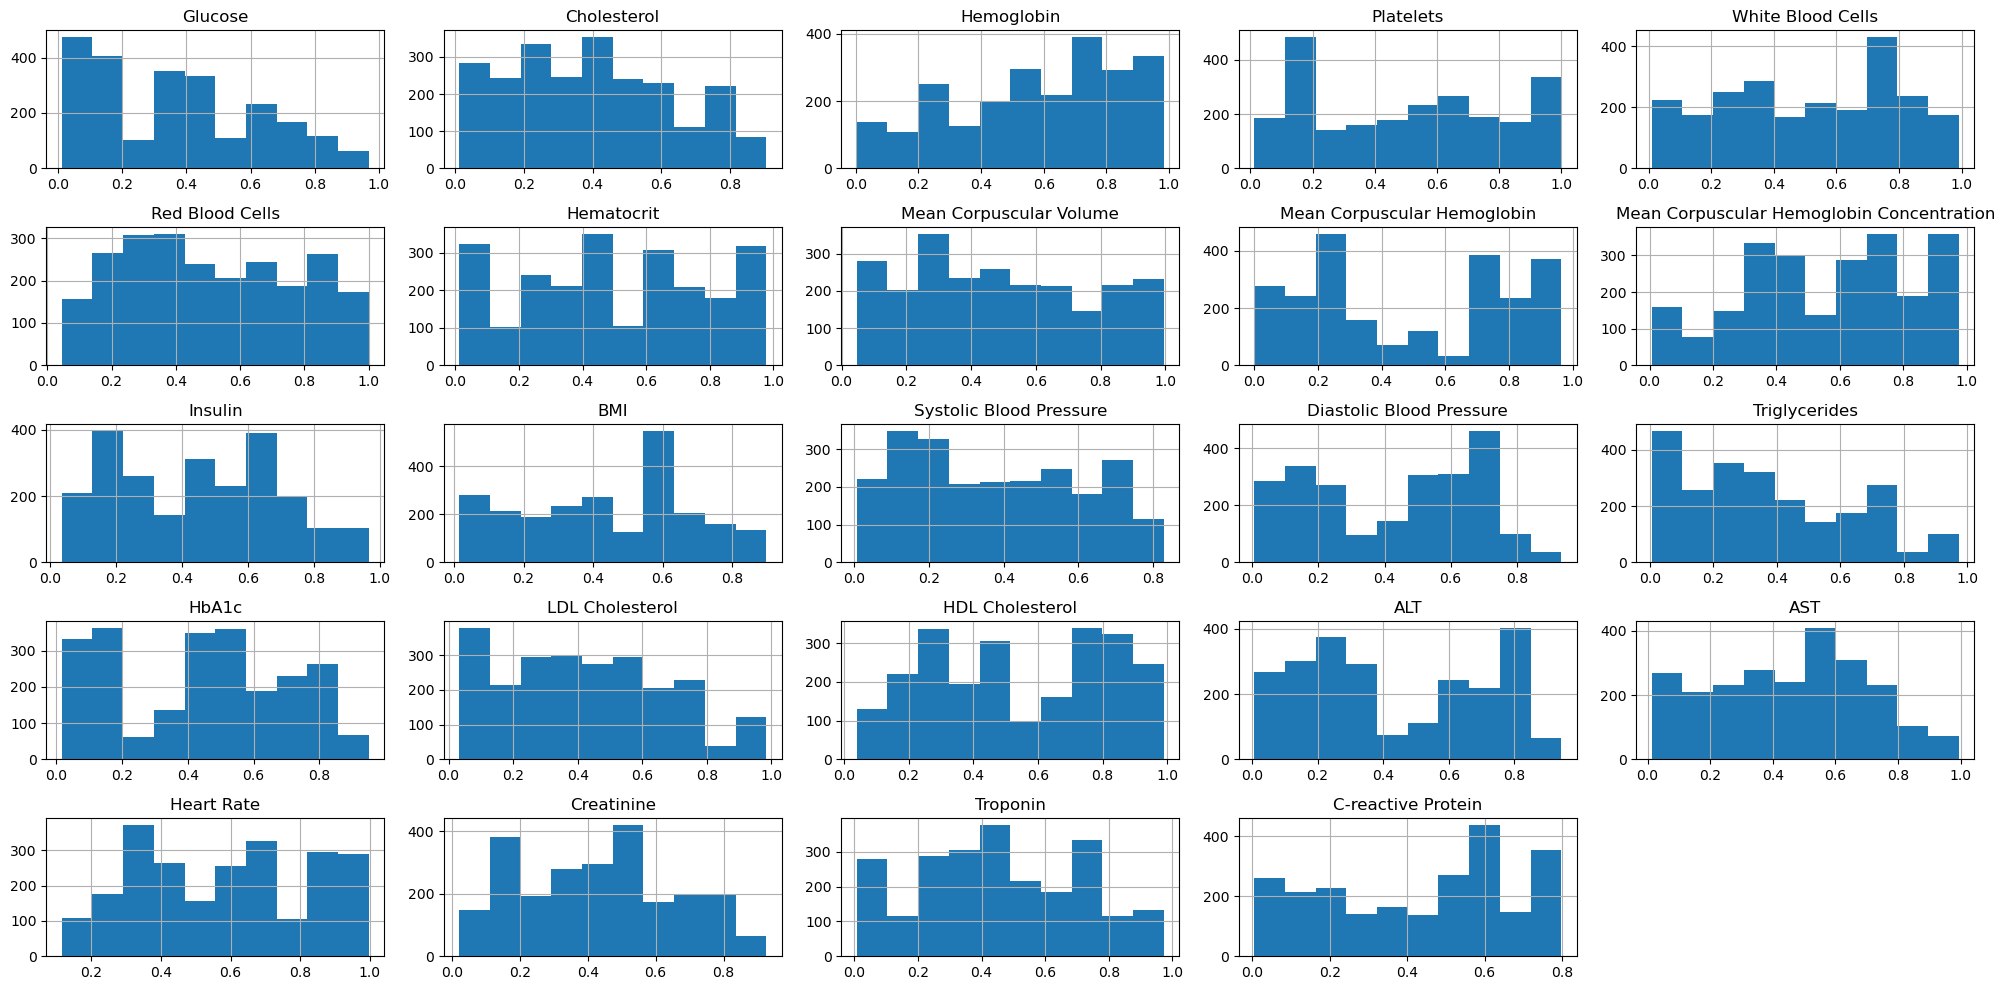

In [12]:
train.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

# count plot of disease

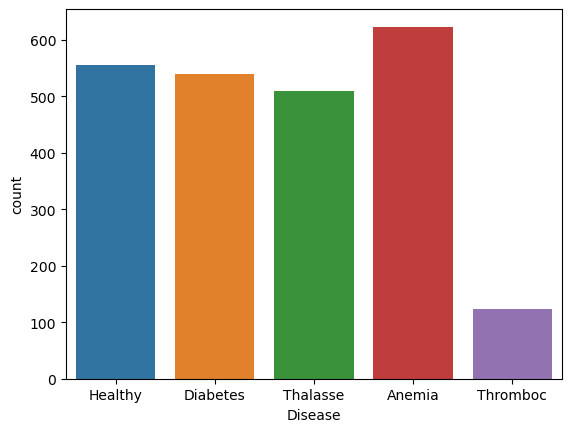

In [13]:
sns.countplot(data= train, x= 'Disease')
plt.show()

<Axes: xlabel='Glucose', ylabel='Troponin'>

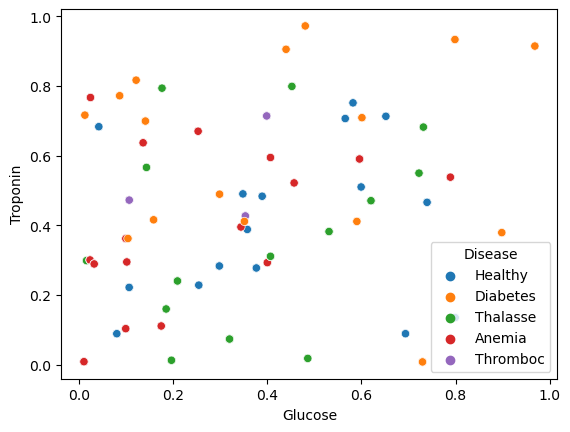

In [14]:
sns.scatterplot(data=train, x='Glucose', y='Troponin', hue='Disease')

<Axes: xlabel='Mean Corpuscular Volume', ylabel='Cholesterol'>

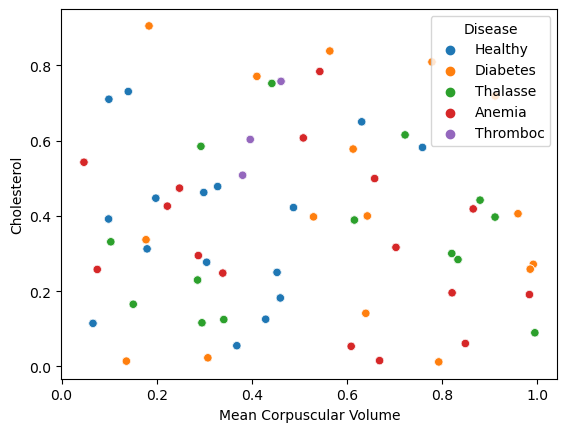

In [15]:
sns.scatterplot(data= train, x='Mean Corpuscular Volume', y='Cholesterol', hue='Disease')

In [16]:
numeric_cols =['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein' ]

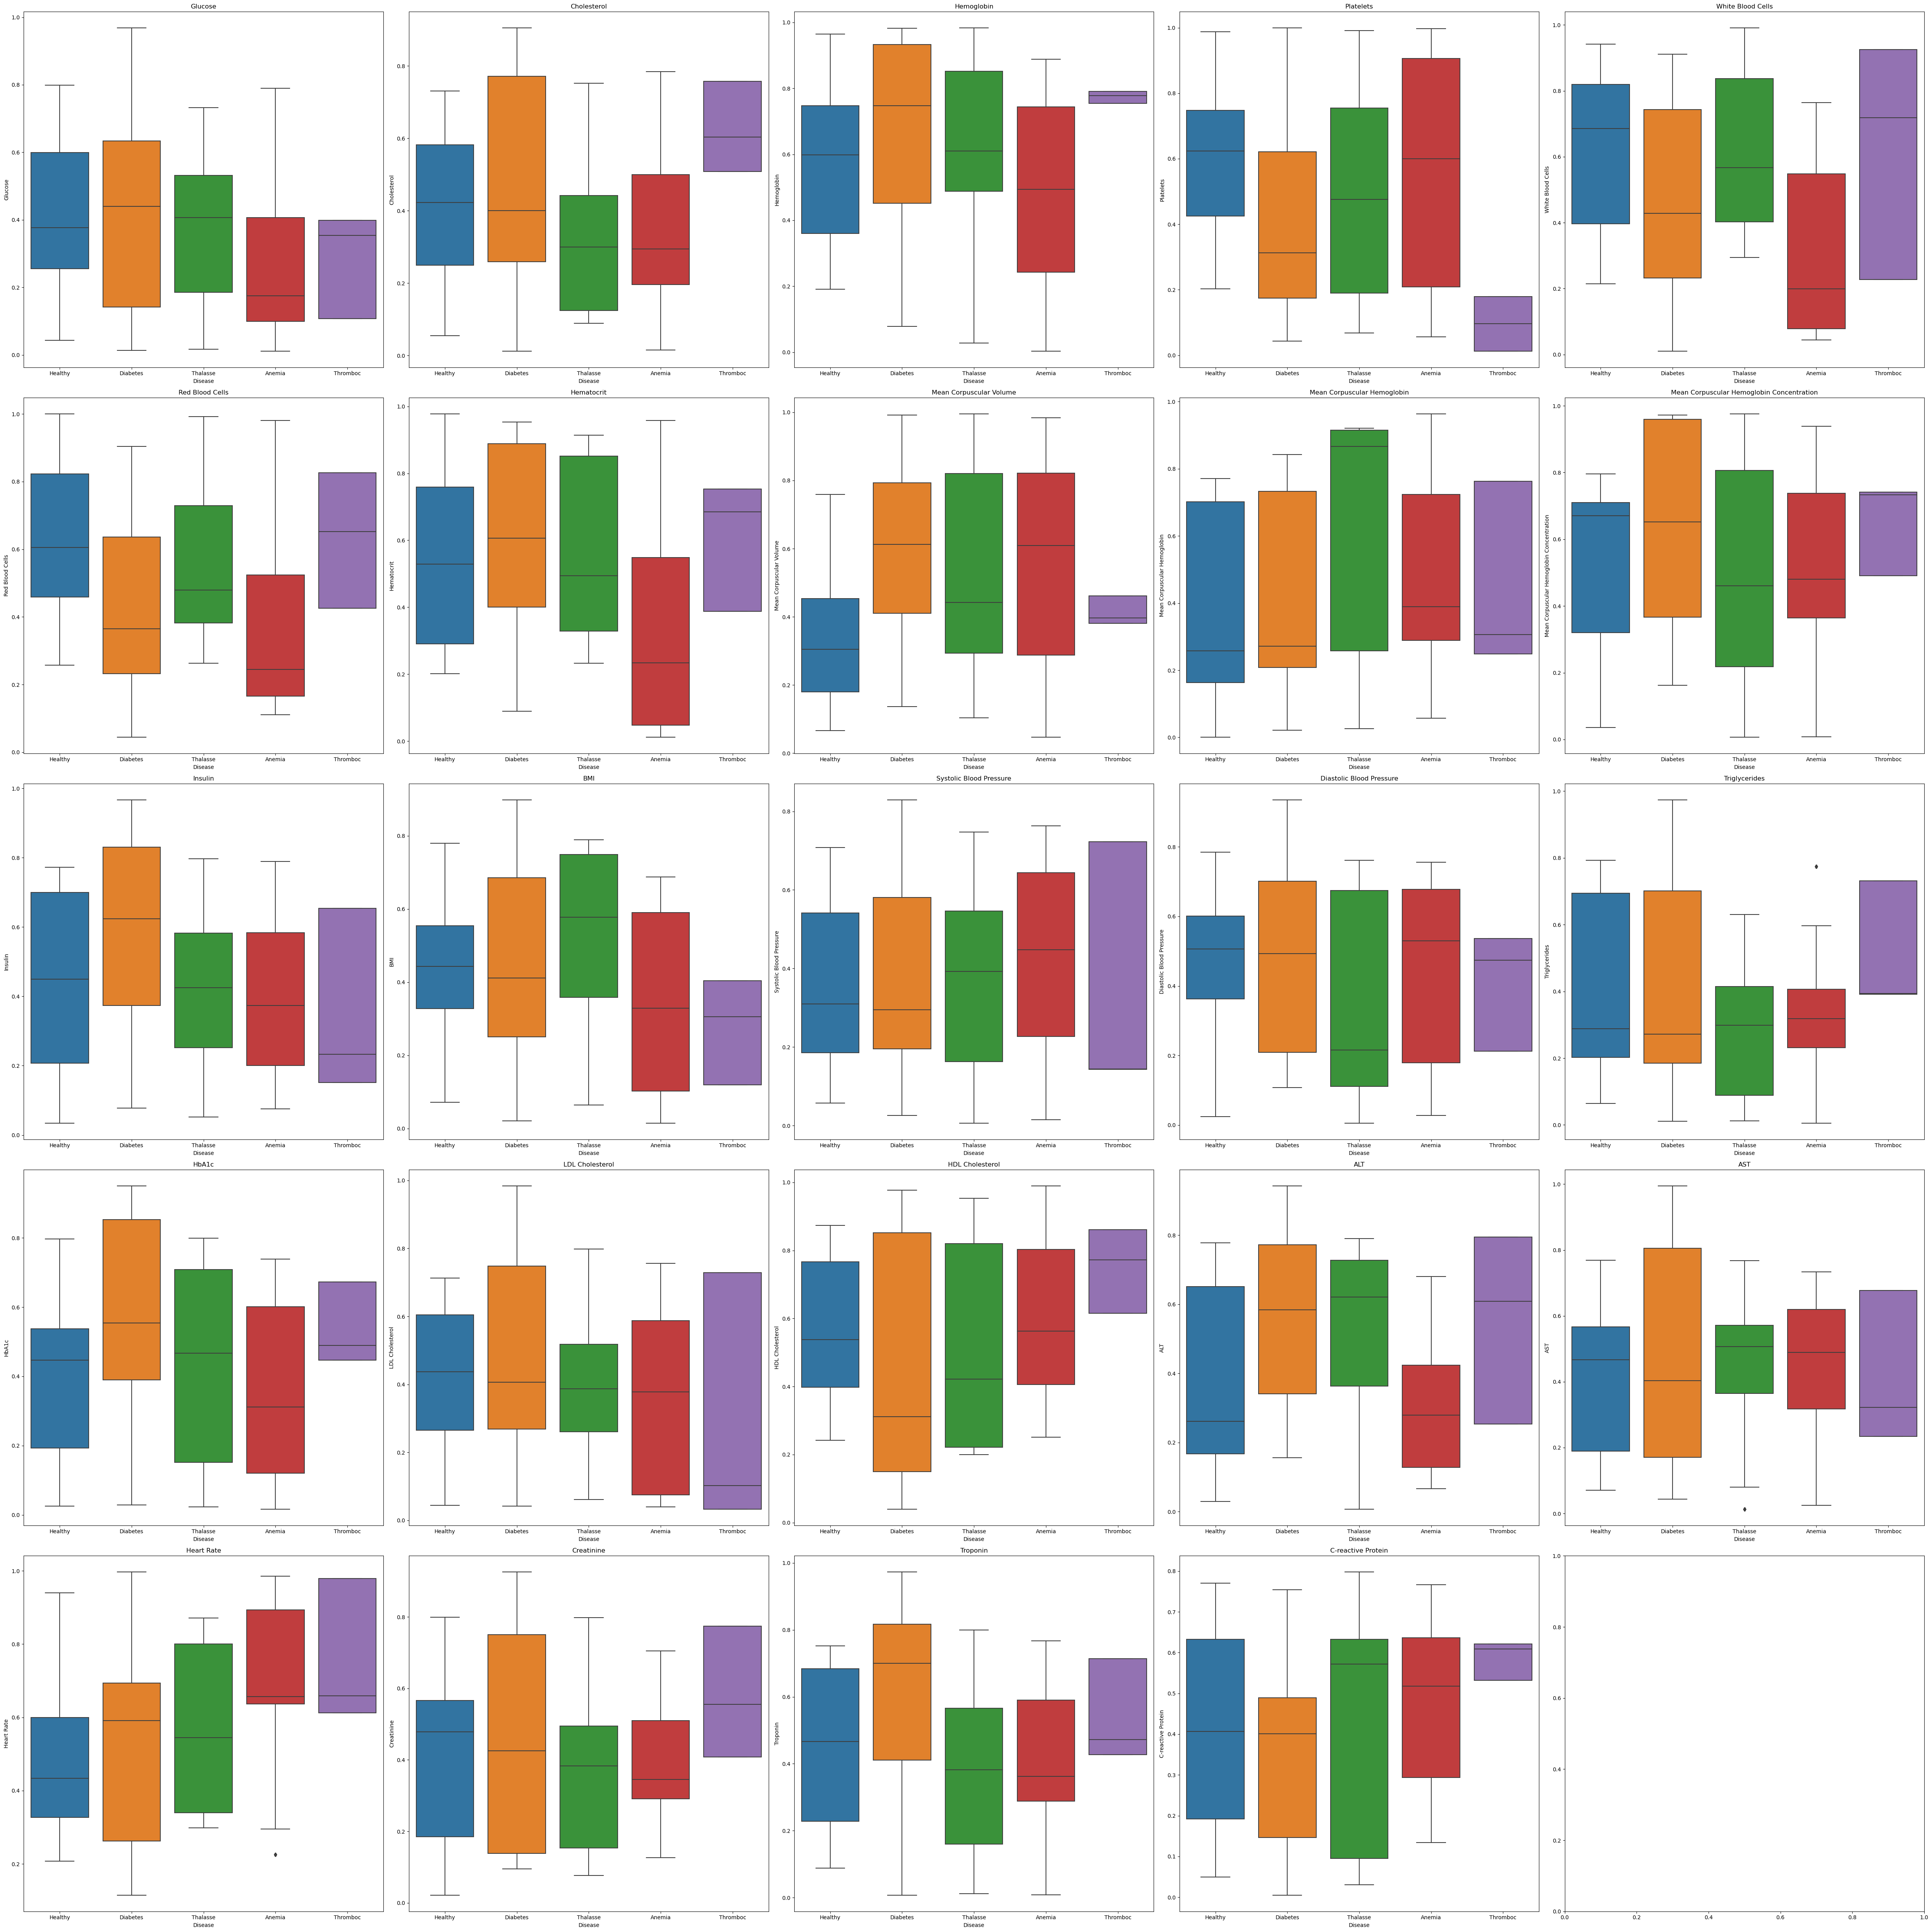

In [17]:
f, ax = plt.subplots(5,5, figsize=(50, 50))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data = train, x = 'Disease', y = cols, ax=ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

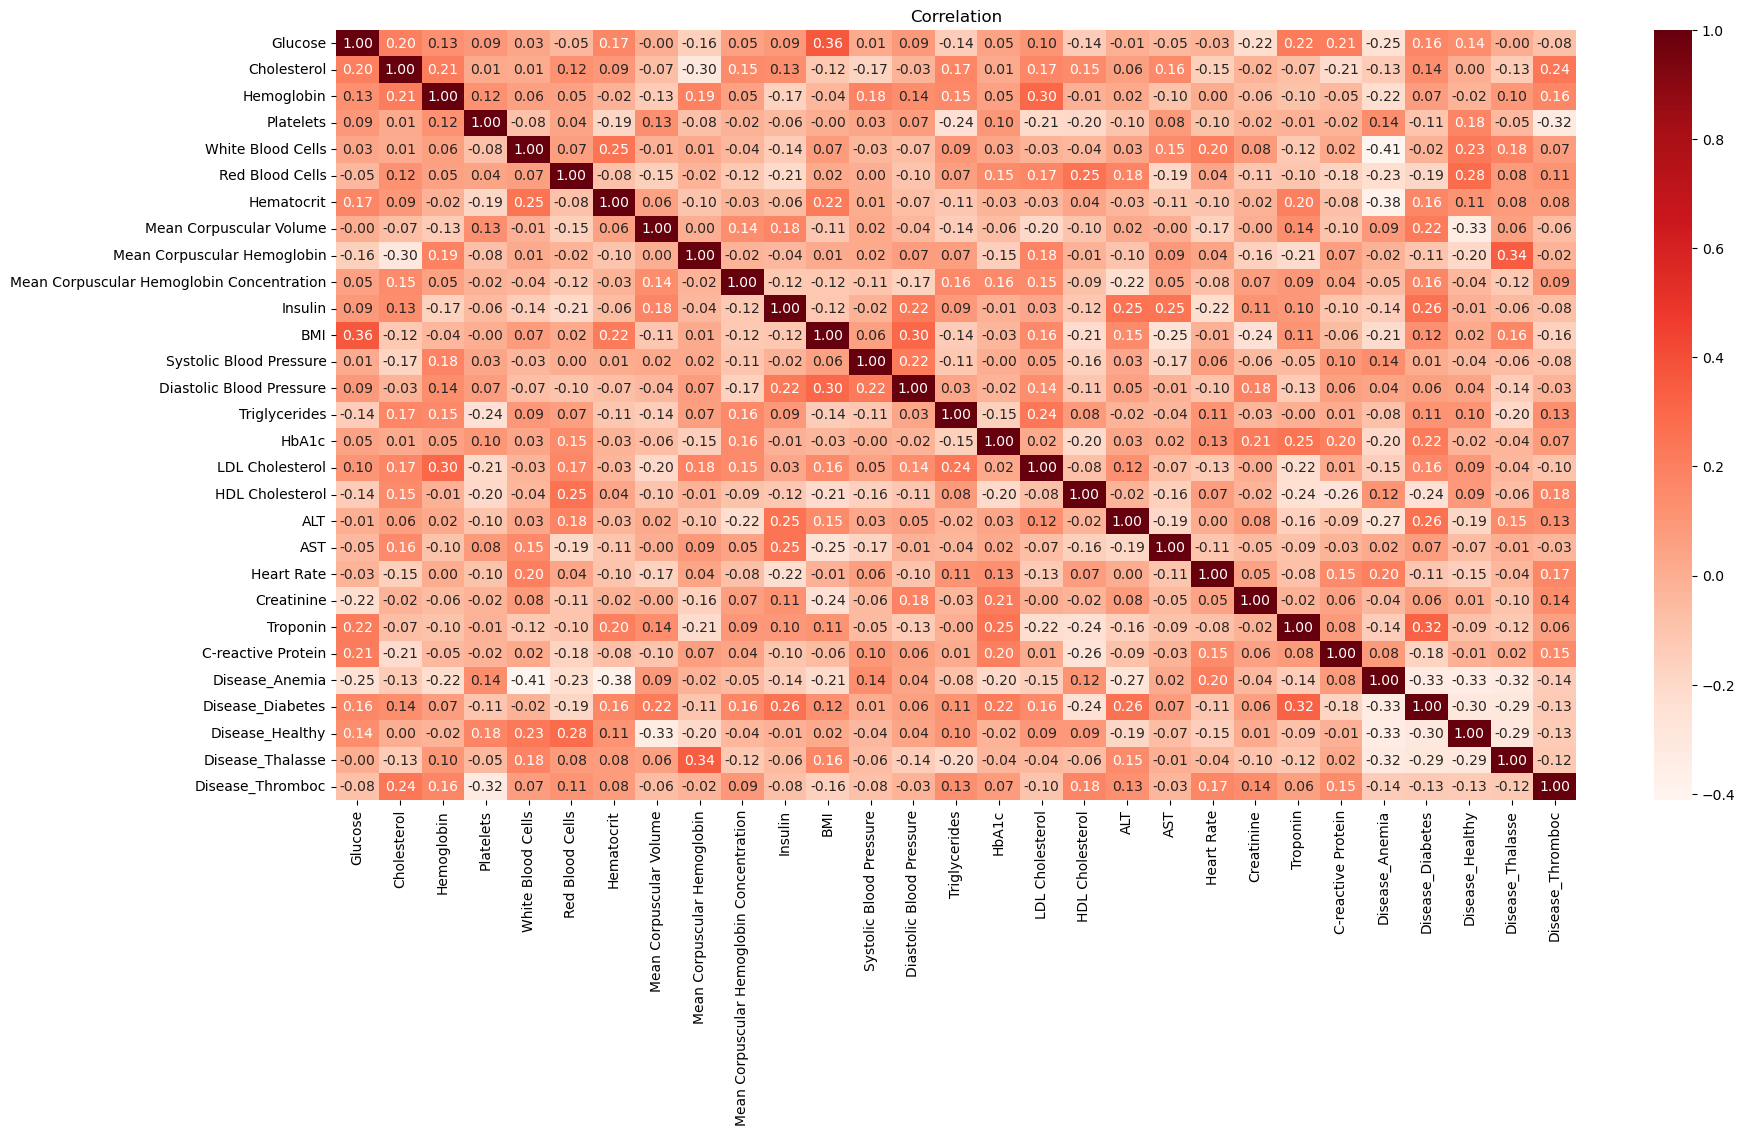

In [18]:
encoded = pd.get_dummies(train)

cor = encoded.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True, cmap = 'Reds', fmt=".2f")
plt.title('Correlation')
plt.show()

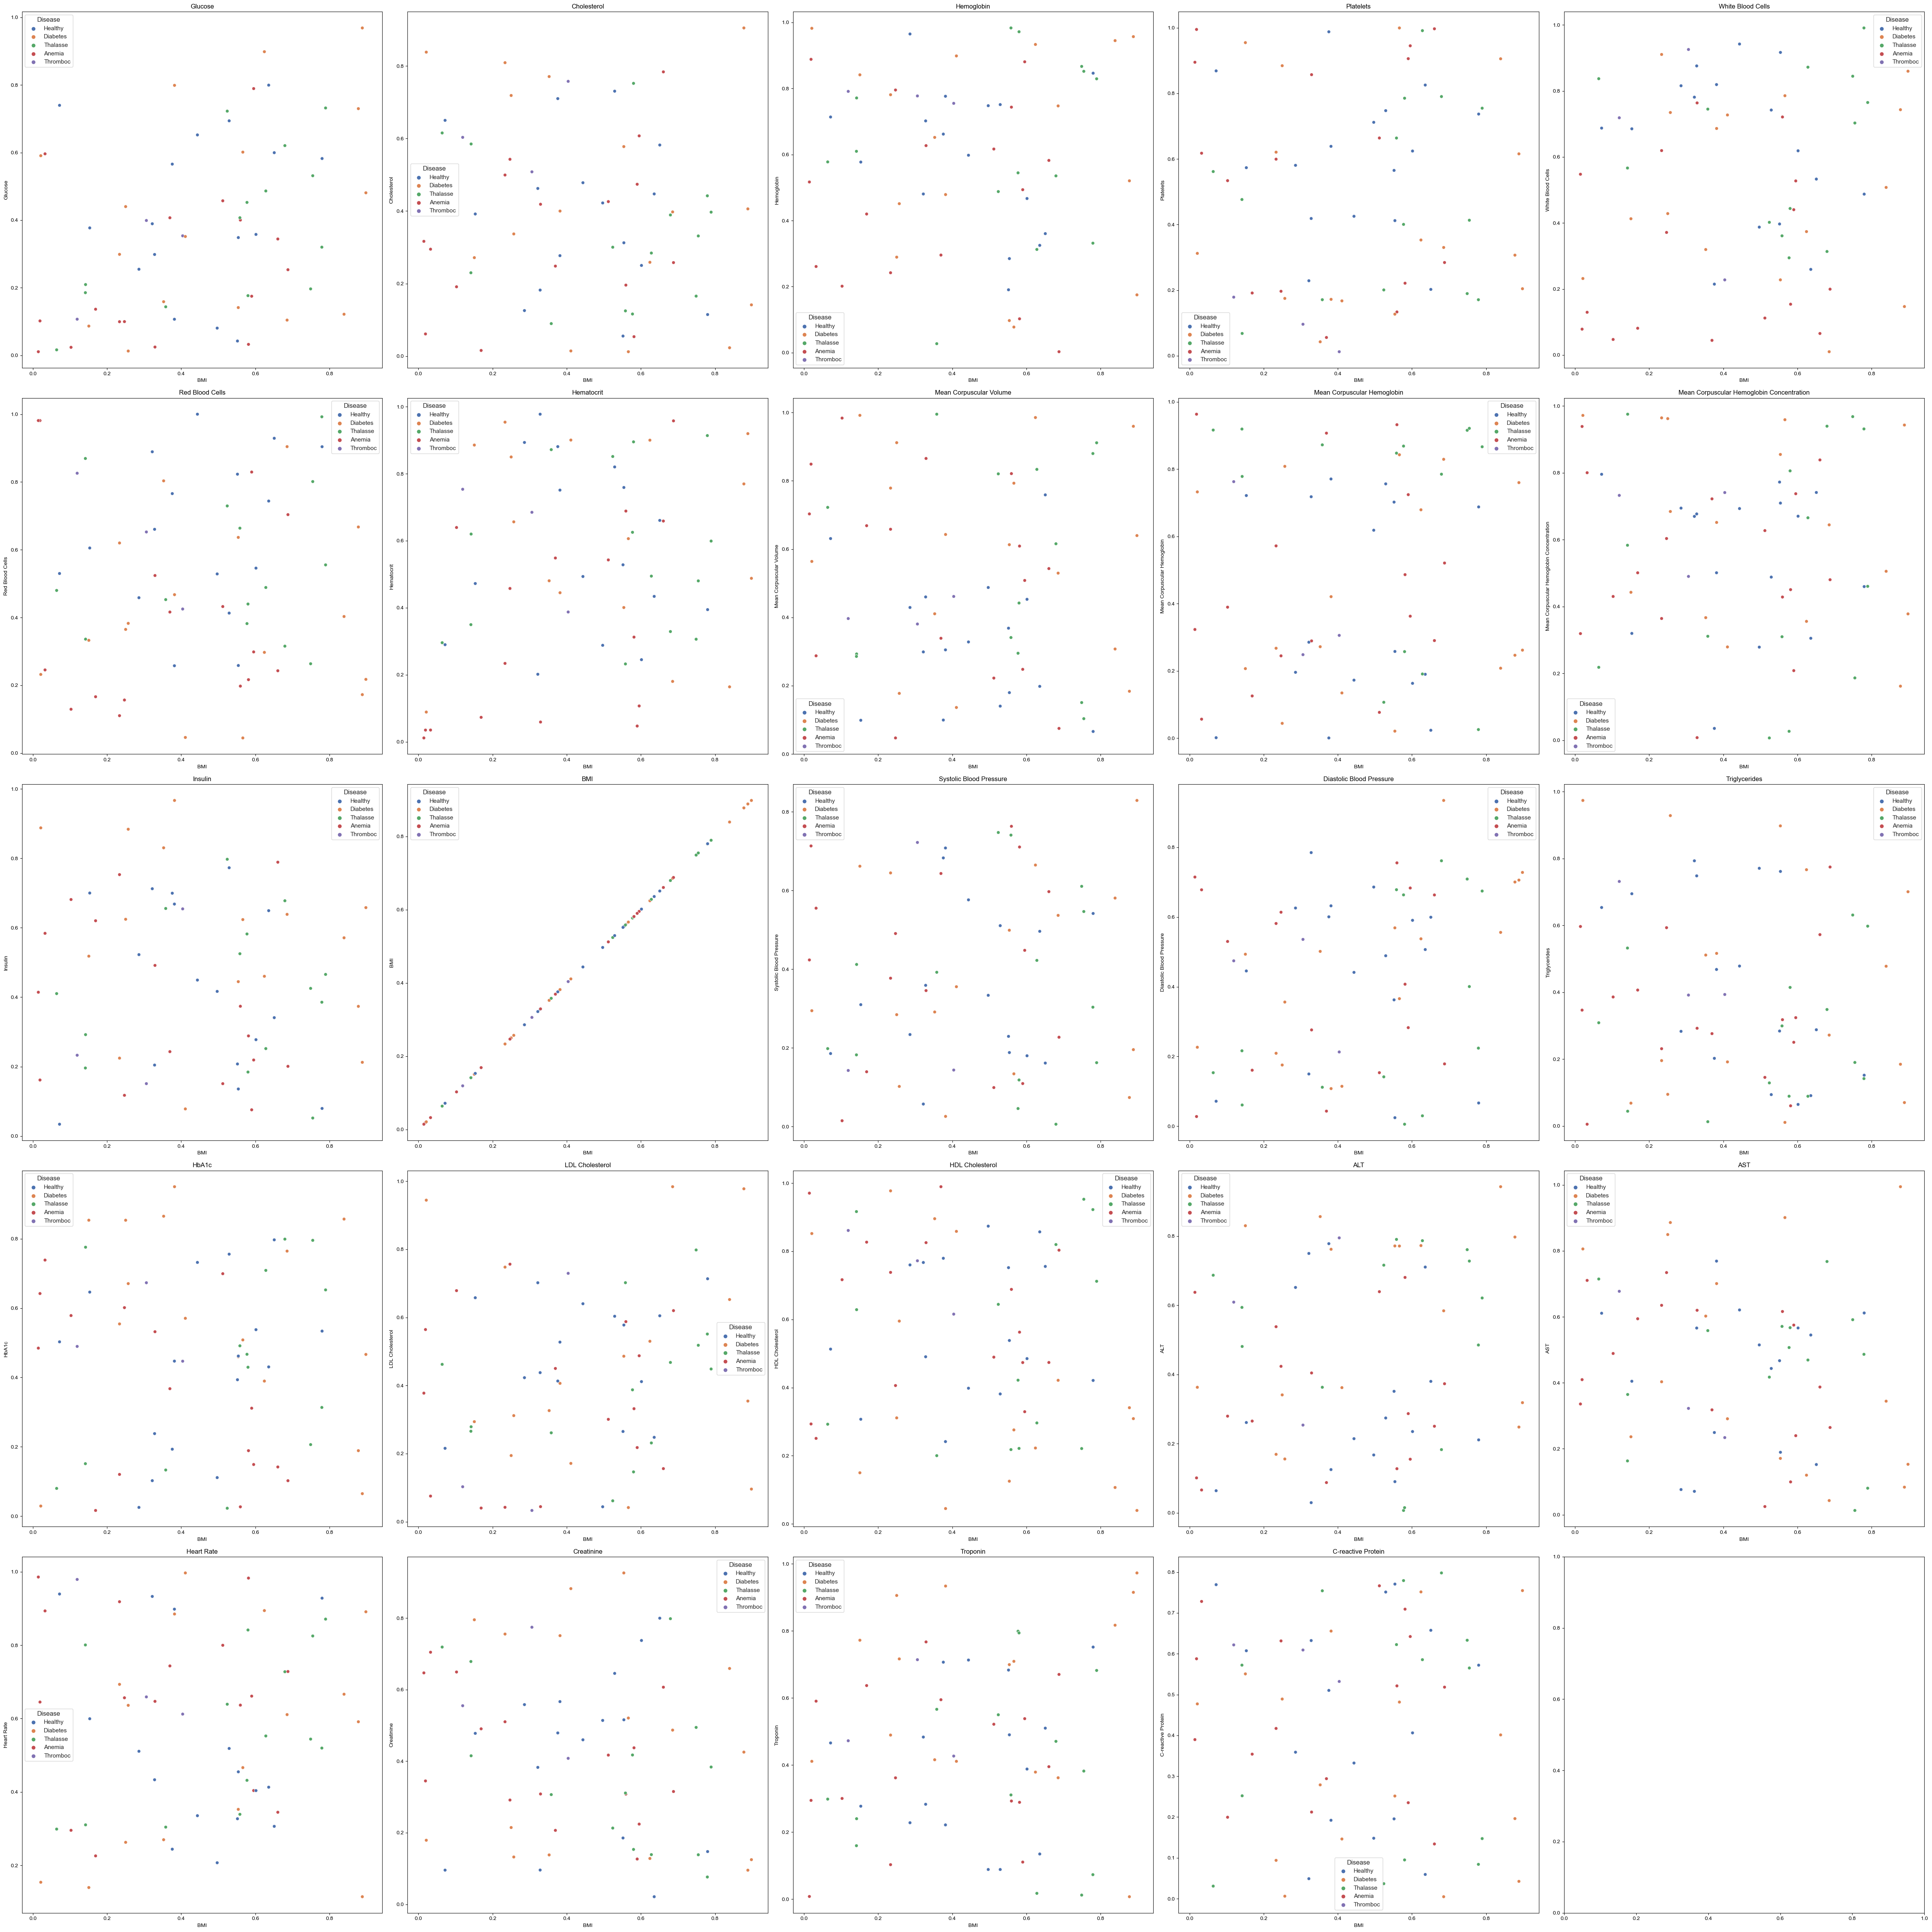

In [19]:
f, ax = plt.subplots(5,5, figsize=(50, 50))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.set(style="white") 
    sns.scatterplot(data=train, x='BMI',y= cols ,hue= 'Disease', ax=ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()    
plt.show()

In [20]:
df = pd.concat([train, test], ignore_index=True)
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [22]:
X = df.drop(columns=['Disease'])
X

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


In [23]:
y = df['Disease']
y

0        Healthy
1       Diabetes
2       Thalasse
3         Anemia
4       Thalasse
          ...   
2832    Diabetes
2833    Heart Di
2834      Anemia
2835    Diabetes
2836    Diabetes
Name: Disease, Length: 2837, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logiostic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression()

LRG.fit(X_train, y_train)

LogisticRegression()

In [26]:
pred_LRG = LRG.predict(X_test)

In [27]:
print(f"Accuracy: {accuracy_score(y_test, pred_LRG)}")
print(f"Precision: {precision_score(y_test, pred_LRG, average='weighted')}")
print(f"Recall: {recall_score(y_test, pred_LRG, average='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_LRG, average='weighted')}")

Accuracy: 0.7975352112676056
Precision: 0.7897619532256624
Recall: 0.7975352112676056
F1 score: 0.7917884314824151


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_LRG))

              precision    recall  f1-score   support

      Anemia       0.85      0.94      0.89       141
    Diabetes       0.72      0.76      0.74       166
     Healthy       0.89      0.76      0.82       119
    Heart Di       0.00      0.00      0.00         8
    Thalasse       0.73      0.76      0.75       110
    Thromboc       0.91      0.88      0.89        24

    accuracy                           0.80       568
   macro avg       0.69      0.68      0.68       568
weighted avg       0.79      0.80      0.79       568



# Random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
pred_RF = RF.predict(X_test)

In [31]:
print(f"Accuracy: {accuracy_score(y_test, pred_RF)}")
print(f"Precision: {precision_score(y_test, pred_RF, average ='weighted')}")
print(f"Recall: {recall_score(y_test, pred_RF, average ='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_RF, average ='weighted')}")

Accuracy: 0.9507042253521126
Precision: 0.9415304947814285
Recall: 0.9507042253521126
F1 score: 0.9444161588174987


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

      Anemia       1.00      0.93      0.96       141
    Diabetes       0.87      0.99      0.93       166
     Healthy       0.99      1.00      1.00       119
    Heart Di       0.00      0.00      0.00         8
    Thalasse       0.97      0.96      0.97       110
    Thromboc       1.00      0.83      0.91        24

    accuracy                           0.95       568
   macro avg       0.81      0.79      0.79       568
weighted avg       0.94      0.95      0.94       568



# Suport vector machine model

In [33]:
from sklearn.svm import SVC
SVM = SVC()

SVM.fit(X_train, y_train)

SVC()

In [34]:
pred_SVM = SVM.predict(X_test)

In [35]:
print(f"Accuracy: {accuracy_score(y_test, pred_SVM)}")
print(f"Precision: {precision_score(y_test, pred_SVM, average ='weighted')}")
print(f"Recall: {recall_score(y_test, pred_SVM, average ='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_SVM, average ='weighted')}")

Accuracy: 0.9471830985915493
Precision: 0.9378664583089038
Recall: 0.9471830985915493
F1 score: 0.9408580063443067


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_SVM))

              precision    recall  f1-score   support

      Anemia       0.96      0.94      0.95       141
    Diabetes       0.87      0.99      0.93       166
     Healthy       0.99      1.00      1.00       119
    Heart Di       0.00      0.00      0.00         8
    Thalasse       1.00      0.93      0.96       110
    Thromboc       1.00      0.83      0.91        24

    accuracy                           0.95       568
   macro avg       0.80      0.78      0.79       568
weighted avg       0.94      0.95      0.94       568



# k-nearest neighbor model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
pred_KNN = KNN.predict(X_test)

In [39]:
print(f"Accuracy: {accuracy_score(y_test, pred_KNN)}")
print(f"Precision: {precision_score(y_test, pred_KNN, average ='weighted')}")
print(f"Recall: {recall_score(y_test,pred_KNN, average ='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_KNN, average ='weighted')}")


Accuracy: 0.8961267605633803
Precision: 0.8905315806156128
Recall: 0.8961267605633803
F1 score: 0.8902790495806514


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

      Anemia       0.93      0.94      0.94       141
    Diabetes       0.94      0.80      0.86       166
     Healthy       0.84      1.00      0.92       119
    Heart Di       0.00      0.00      0.00         8
    Thalasse       0.90      0.94      0.92       110
    Thromboc       0.81      0.88      0.84        24

    accuracy                           0.90       568
   macro avg       0.74      0.76      0.75       568
weighted avg       0.89      0.90      0.89       568



In [41]:
from prettytable import PrettyTable
 
# These 5 are the columns of the tables
t = PrettyTable(['models', 'accuracy', 'precision','recall','f1 score'])
 
# To insert rows:
t.add_row(['logistic regression', '0.7975352112676056','0.7897619532256624', '0.7975352112676056', '0.7917884314824151' ])
t.add_row(['random forest', '0.9507042253521126', '0.9437345723827502' ,'0.9507042253521126' ,'0.9447952387051772'])
t.add_row(['SVM', '0.9471830985915493', '0.9378664583089038','0.9471830985915493','0.9408580063443067'])
t.add_row(['KNN', '0.8961267605633803', '0.8905315806156128','0.8961267605633803',' 0.8902790495806514'])


In [42]:
print(t)

+---------------------+--------------------+--------------------+--------------------+---------------------+
|        models       |      accuracy      |     precision      |       recall       |       f1 score      |
+---------------------+--------------------+--------------------+--------------------+---------------------+
| logistic regression | 0.7975352112676056 | 0.7897619532256624 | 0.7975352112676056 |  0.7917884314824151 |
|    random forest    | 0.9507042253521126 | 0.9437345723827502 | 0.9507042253521126 |  0.9447952387051772 |
|         SVM         | 0.9471830985915493 | 0.9378664583089038 | 0.9471830985915493 |  0.9408580063443067 |
|         KNN         | 0.8961267605633803 | 0.8905315806156128 | 0.8961267605633803 |  0.8902790495806514 |
+---------------------+--------------------+--------------------+--------------------+---------------------+


In [43]:
print(f"LRG_Accuracy: {accuracy_score(y_test, pred_LRG)}")
print(f"RF_Accuracy: {accuracy_score(y_test, pred_RF)}")
print(f"SVM_Accuracy: {accuracy_score(y_test, pred_SVM)}")
print(f"KNN_Accuracy: {accuracy_score(y_test, pred_KNN)}")

LRG_Accuracy: 0.7975352112676056
RF_Accuracy: 0.9507042253521126
SVM_Accuracy: 0.9471830985915493
KNN_Accuracy: 0.8961267605633803
